In [96]:
from pathlib import Path
import cv2
import numpy as np
from mlbox.settings import ROOT_DIR
import matplotlib.pyplot as plt


In [98]:
img_file = Path("/mnt/c/My storage/Python projects/MLBox/assets/LabelGuard/input/source/Lovita_CC_Glazur_150g_UNI_v181224E копія.jpg")


img = cv2.imread(str(img_file))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


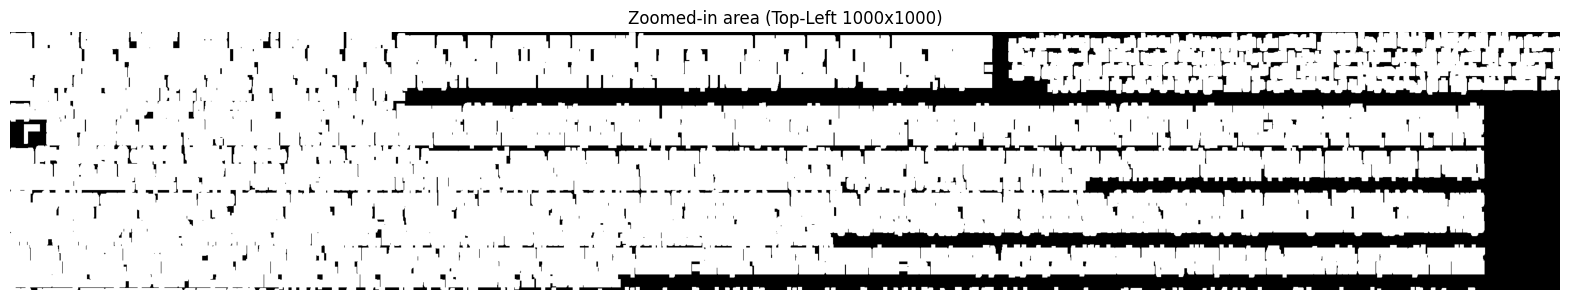

In [103]:

# Adaptive thresholding
thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, blockSize=31, C=15
)

# Vertical dilation
kernel_v = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 7))
kernel_h = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 1))
joined = thresh
joined = cv2.dilate(joined, kernel_v, iterations=2)
joined = cv2.dilate(joined, kernel_h, iterations=2)
# Show result


# Show result using matplotlib
# Crop region of interest (y1:y2, x1:x2)
zoom = joined[0:500, 0:3000]
#zoom = dilated_v[0:500, 1500:2500]

plt.figure(figsize=(20, 20))
plt.imshow(zoom, cmap='gray')
plt.title("Zoomed-in area (Top-Left 1000x1000)")
plt.axis("off")
plt.show()


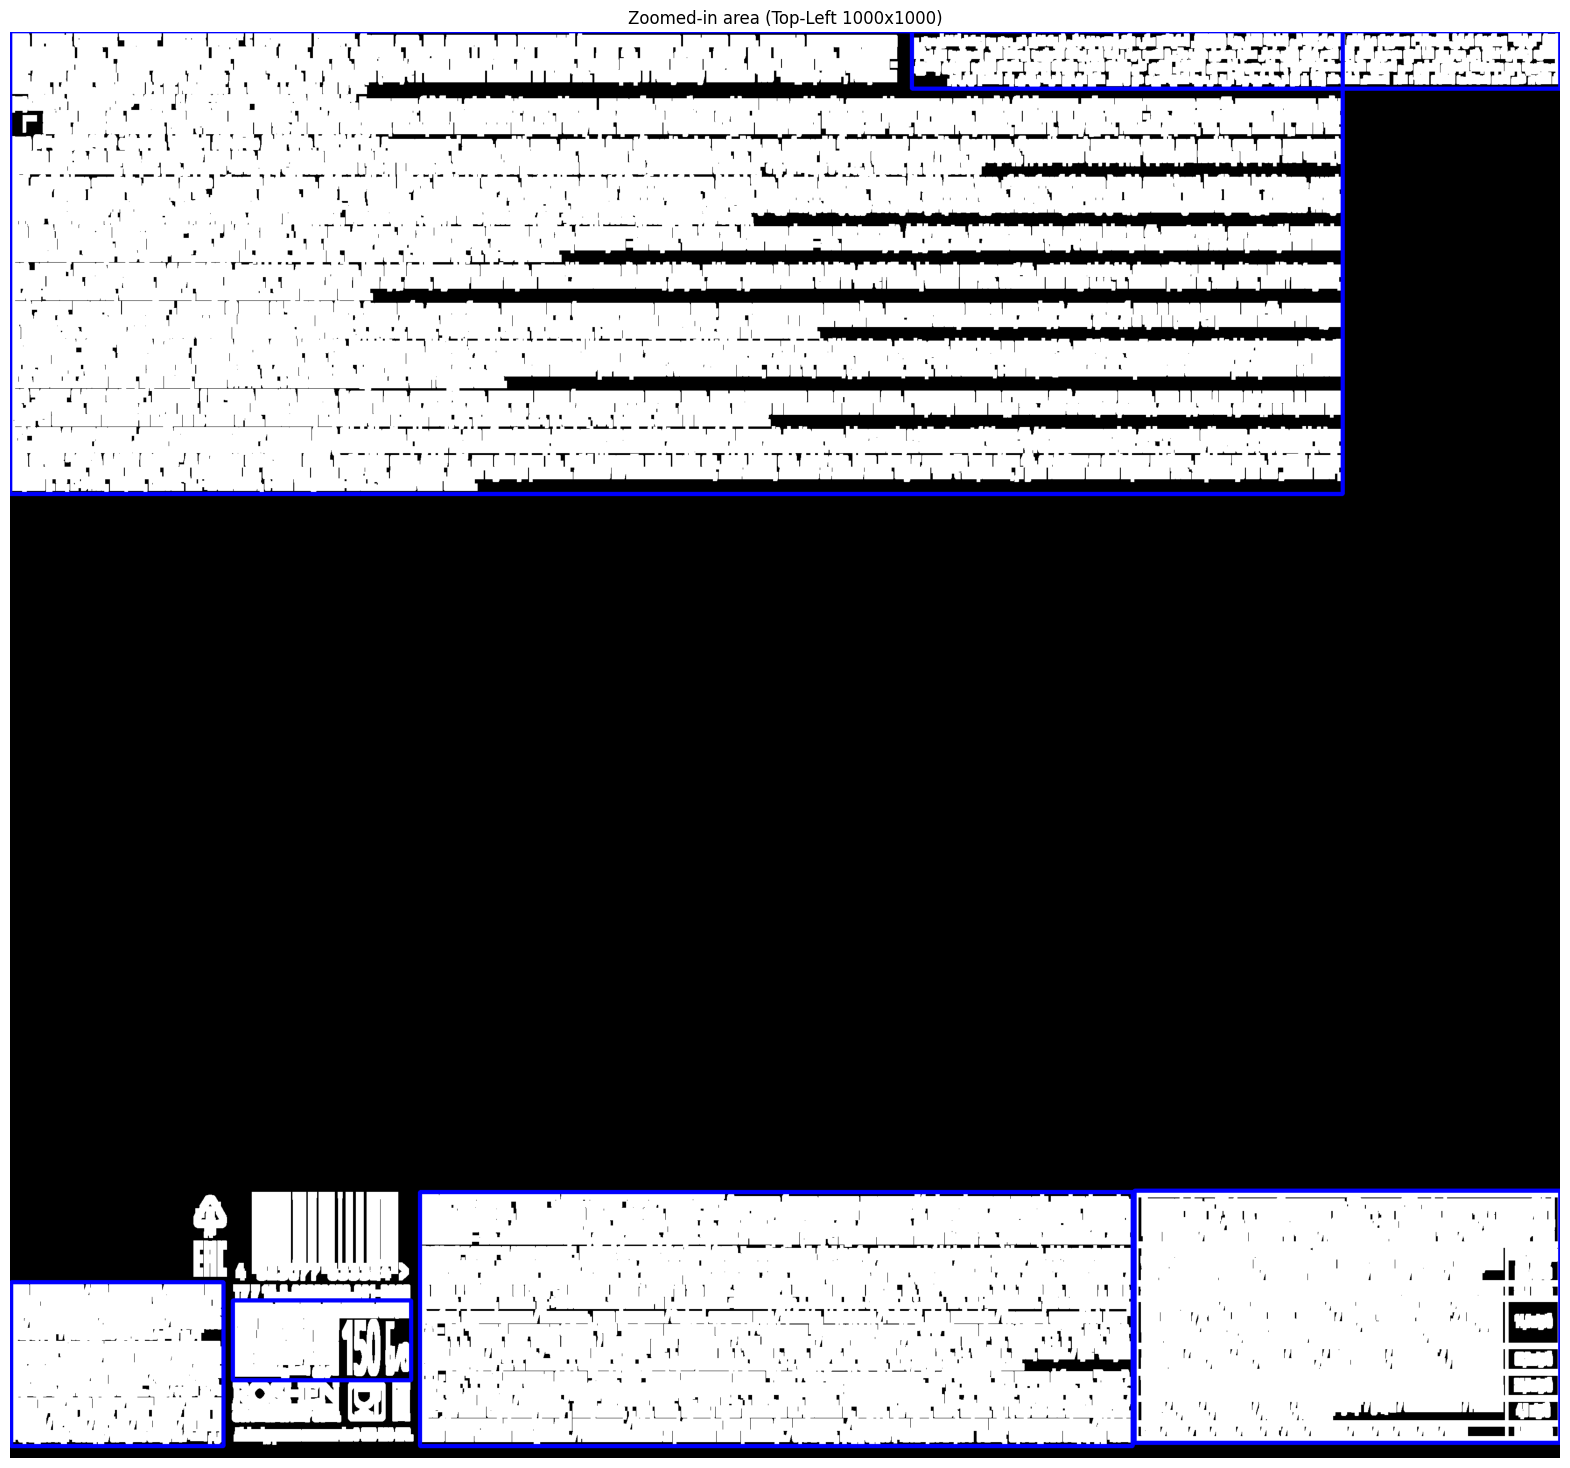

In [104]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a copy for drawing
joined_copy = cv2.cvtColor(joined.copy(), cv2.COLOR_GRAY2BGR)

contours, _ = cv2.findContours(joined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

blocks = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    area = w * h
    if 250*250 < area < 100000000:
        blocks.append((x, y, x + w, y + h))
        cv2.rectangle(joined_copy, (x, y), (x + w, y + h), (0, 0, 255), 8)

zoom = joined_copy#[0:2500, 0:4000]
# Show the result
plt.figure(figsize=(20, 20))
plt.imshow(zoom, cmap='gray')
plt.title("Zoomed-in area (Top-Left 1000x1000)")
plt.axis("off")
plt.show()
